In [1]:
import json
from os.path import join
import os
os.chdir("/home/tiagoalmeida/bioASQ-taskb/")

import sys
import pickle
import gc
import numpy as np
import tarfile
import random


##add keras to the modules
module_path = os.path.abspath(os.path.join('pubmed_data'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from pubmed_data import pubmed_helper as ph

import


In [14]:
#load bllip tokenized data
regex_tokenized_articles = []

for articles in ph.create_tokenized_pubmed_collection_generator(mode = "regex_full_tokens")():
    regex_tokenized_articles.extend(articles)



Open /backup/pubmed_archive_tokenized/regex_full_tokens_title_abs.tar.gz
Creating generator
Open the file: regex_full_tokens_file_000_title_abs_pubmed.p
Returning: 3690895 articles
Force garbage collector 0
Open the file: regex_full_tokens_file_001_title_abs_pubmed.p
Returning: 3643138 articles
Force garbage collector 0
Open the file: regex_full_tokens_file_002_title_abs_pubmed.p
Returning: 3790281 articles
Force garbage collector 0
Open the file: regex_full_tokens_file_003_title_abs_pubmed.p
Returning: 3838006 articles
Force garbage collector 0
Open the file: regex_full_tokens_file_004_title_abs_pubmed.p
Returning: 3862035 articles
Force garbage collector 0


In [16]:
regex_len_docs = list(map(lambda x:len(x),regex_tokenized_articles))

In [3]:
bllip_len_docs = list(map(lambda x:len(x),bllip_tokenized_articles))

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

%matplotlib inline



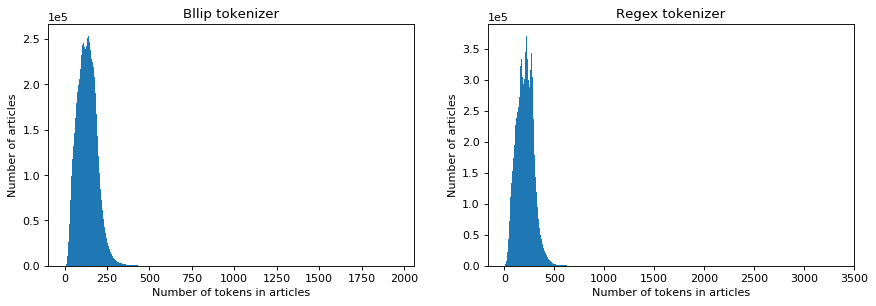

In [26]:
figure(num=None, figsize=(13, 4), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.title("Bllip tokenizer")
plt.xlabel("Number of tokens in articles")
plt.ylabel("Number of articles")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.hist(bllip_len_docs, bins=1000)

plt.subplot(1, 2, 2)
plt.title("Regex tokenizer")
plt.xlabel("Number of tokens in articles")
plt.ylabel("Number of articles")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.hist(regex_len_docs, bins=1000)

plt.savefig('bllip_regex_doc_len.png', bbox_inches='tight')

In [24]:
print(np.mean(bllip_len_docs))
print(np.mean(regex_len_docs))

132.61211414680608
208.26819219038316


In [28]:
bllip_tokenizer = ph.load_tokenizer(mode="bllip_stem_full_tokens")
regex_tokenizer = ph.load_tokenizer(mode="regex_full_tokens")

Load bllip_stem_full_tokens_tokenizer.p
Load regex_full_tokens_tokenizer.p


In [32]:
bioASQ_data_path = "/backup/BioASQ-training7b/training7b_filter.json"

with open(bioASQ_data_path) as f:
    bioASQ_data_full = json.load(f)
    if isinstance(bioASQ_data_full,list):
        bioASQ_data = bioASQ_data_full
    else:
        bioASQ_data = bioASQ_data_full["questions"]
        
#only the body
bllip_len_queries = list(map(lambda x:len(bllip_tokenizer.texts_to_sequences([x["body"]])[0]), bioASQ_data))
regex_len_queries = list(map(lambda x:len(regex_tokenizer.texts_to_sequences([x["body"]])[0]), bioASQ_data))


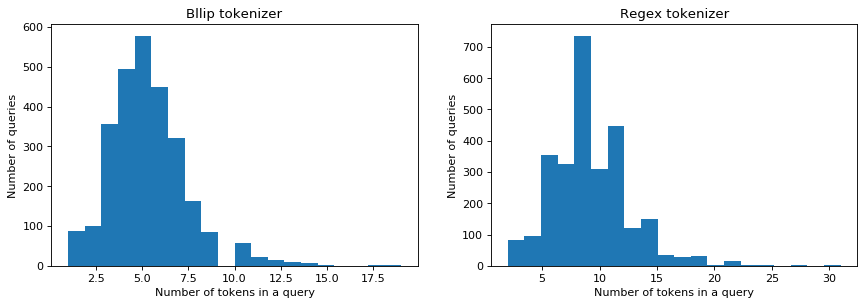

In [39]:
figure(num=None, figsize=(13, 4), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.title("Bllip tokenizer")
plt.xlabel("Number of tokens in a query")
plt.ylabel("Number of queries")
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.hist(bllip_len_queries, bins=20)

plt.subplot(1, 2, 2)
plt.title("Regex tokenizer")
plt.xlabel("Number of tokens in a query")
plt.ylabel("Number of queries")
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.hist(regex_len_queries, bins=20)

plt.savefig('bllip_regex_query_len.png', bbox_inches='tight')

In [40]:
print(np.mean(bllip_len_queries))
print(np.mean(regex_len_queries))

5.283218056061157
9.218784128139788
